### Importações

In [1]:
import pandas as pd
import numpy as np
import sys
import os

In [2]:
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, '..'))
if project_root not in sys.path:
    sys.path.append(project_root)
from Functions.FNC_Pro import lista_produtos, configurar_credenciais_bq, Base_venda, best_sellers

In [3]:
SKU = '21120'

### Best Sellers

In [4]:
base_best_sellers = best_sellers(r'C:/Users/joao.pcarvalho/Desktop/Git Repositórios/Forecast-vendas-e-elasticidade/Forecast/Best_Sellers.xlsx')


### Base de vendas

In [5]:
configurar_credenciais_bq(r'G:Drives compartilhados/Bases BI/epoca-230913-b478a9a0dd4c.json')

Venda = Base_venda(SKU)

c:\Users\joao.pcarvalho\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\cloud\bigquery\table.py:1727: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


SKU 21120: Histórico de dados ajustado para começar em 2023-01-02, o primeiro dia com vendas.


c:\Users\joao.pcarvalho\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [6]:
Venda.tail(40)

,SKU,Preco_Listado,Preco,Demanda,Log_Preco,Log_Demanda,Log_Demanda_7D,Ano_Mes,Black_Friday,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira,Log_Preco_7D,promocionado
Data,,,,,,,,,,,,,,,,,,
2025-08-27,21120,56.15,56.15,38.0,4.028027,3.637586,3.583519,2025-08,0,0,1,0,0,0,0,0,4.085496,0
2025-08-28,21120,54.79,54.79,44.0,4.003508,3.784190,3.587479,2025-08,0,0,0,1,0,0,0,0,4.069954,0
2025-08-29,21120,55.26,55.26,34.0,4.012049,3.526361,3.603166,2025-08,0,0,0,0,0,1,0,0,4.055554,0
2025-08-30,21120,54.37,54.37,48.0,3.995813,3.871201,3.674491,2025-08,0,0,0,0,0,0,1,0,4.039084,0
2025-08-31,21120,55.21,55.21,40.0,4.011144,3.688879,3.717050,2025-08,0,1,0,0,0,0,0,0,4.023079,0
2025-09-01,21120,56.61,56.61,58.0,4.036186,4.060443,3.787431,2025-09,0,0,0,0,1,0,0,0,4.016023,0
2025-09-02,21120,55.03,55.03,64.0,4.007878,4.158883,3.840987,2025-09,0,0,0,0,0,0,0,1,4.013599,0
2025-09-03,21120,53.77,53.77,67.0,3.984716,4.204693,3.926208,2025-09,0,0,1,0,0,0,0,0,4.007437,0
2025-09-04,21120,58.58,58.58,33.0,4.070393,3.496508,3.894732,2025-09,0,0,0,1,0,0,0,0,4.017232,0


### Avaliação estatística

=== AVALIAÇÃO ESTATÍSTICA PARA SKU 21120 ===

1. ESTATÍSTICAS DESCRITIVAS:
           Preco    Demanda  Log_Preco  Log_Demanda  Log_Preco_7D  \
count  1008.0000  1008.0000  1008.0000    1008.0000     1008.0000   
mean     60.2569    95.0516     4.0915       3.8964        4.0945   
std       7.2756   165.5601     0.1197       1.7962        0.0948   
min      23.6400     0.0000     3.1629      -4.6052        3.8587   
25%      55.5625    38.7500     4.0175       3.6571        4.0356   
50%      59.1000    67.0000     4.0792       4.2047        4.0848   
75%      64.0500   108.0000     4.1597       4.6821        4.1516   
max      87.9000  3097.0000     4.4762       8.0382        4.4413   

       Log_Demanda_7D  
count       1008.0000  
mean           4.1837  
std            1.0382  
min           -1.2528  
25%            3.7769  
50%            4.3447  
75%            4.7102  
max            6.4648  


2. VALORES MISSING:
SKU               0
Preco_Listado     0
Preco             0
Deman

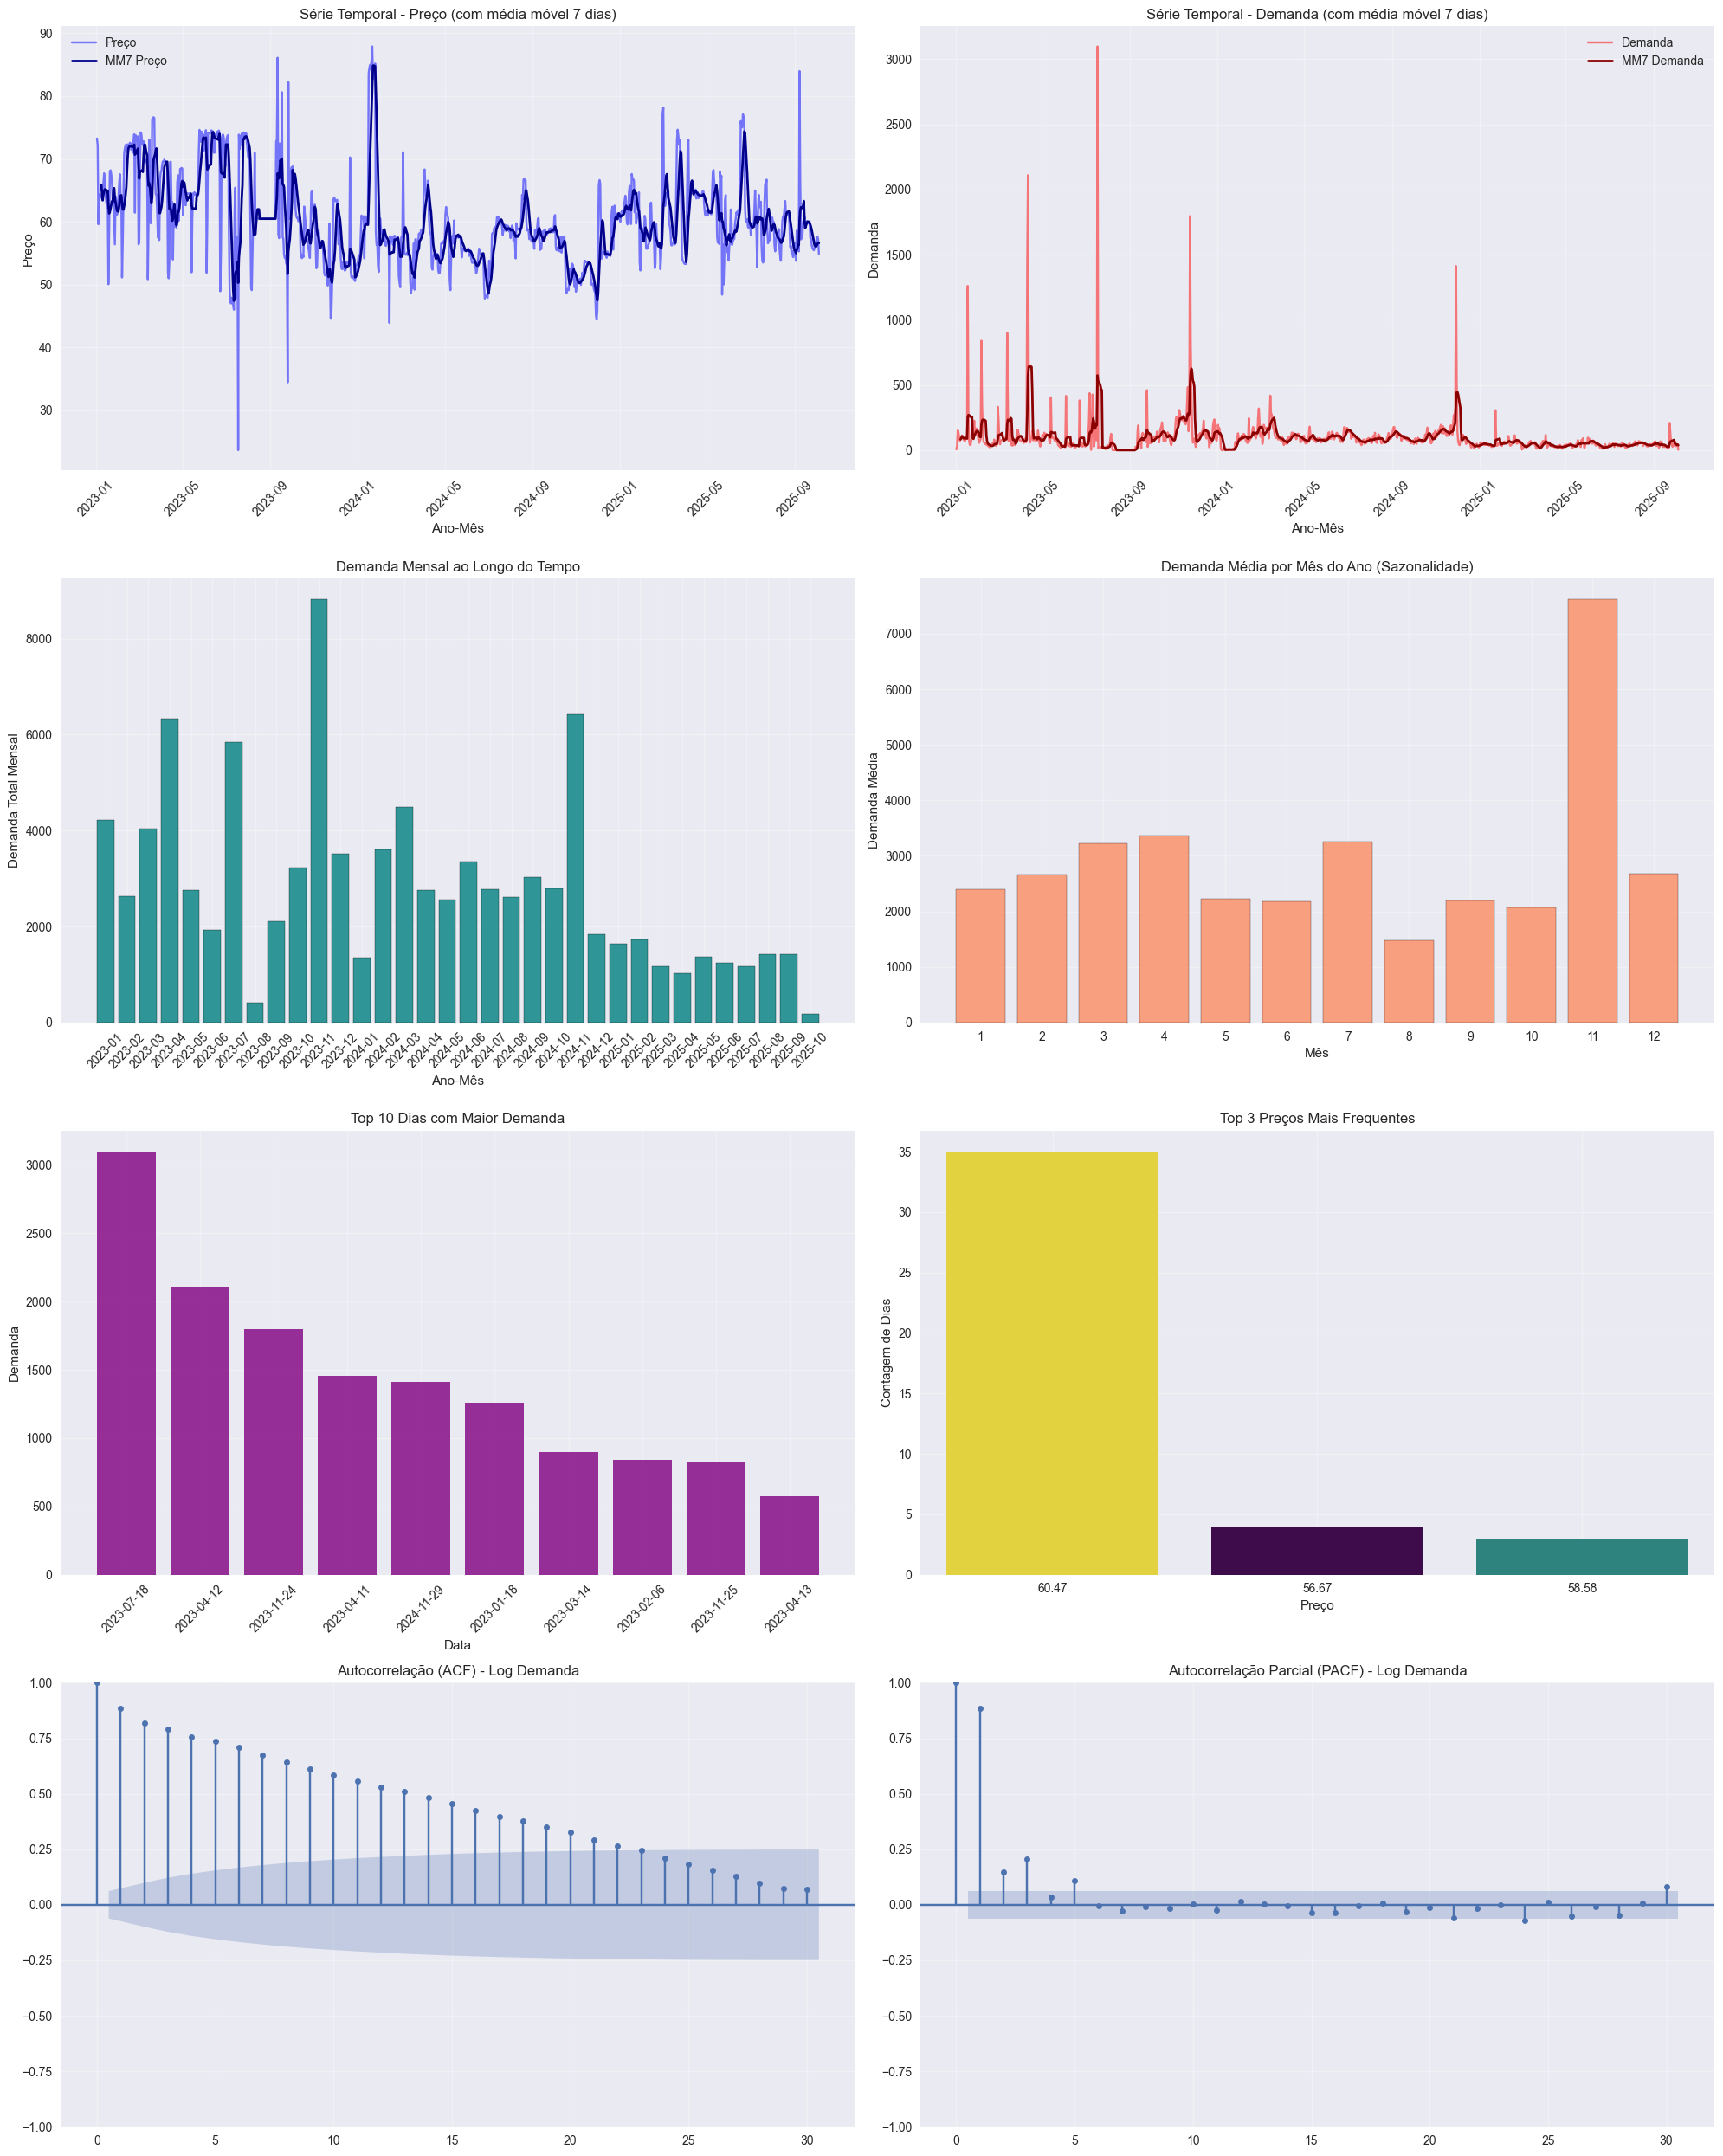

7. ANÁLISE DE SAZONALIDADE POR DIA DA SEMANA:
Demanda média por dia da semana:
  Segunda-feira: 87.83
  Terça-feira: 124.26
  Quarta-feira: 112.42
  Quinta-feira: 88.53
  Sexta-feira: 98.69
  Sábado: 72.48
  Domingo: 81.15

8. RESUMO E RECOMENDAÇÕES PARA MODELAGEM:
TODAS as variáveis são estacionárias - OK para modelagem

 Correlação Log_Preco x Log_Demanda: -0.3191
   → Correlação fraca a moderada

 RECOMENDAÇÕES FINAIS PARA VALIDAÇÃO CRUZADA:
1. Variáveis já estacionárias - pode prosseguir diretamente
4. Use TimeSeriesSplit do sklearn para validação cruzada temporal
5. Monitore overfitting comparando performance treino/teste
6. Considere modelos SARIMA para capturar sazonalidade

 Análise concluída - Dados prontos para modelagem!


(     AnoMes      Preco  Demanda  Log_Preco  Log_Demanda
 0   2023-01  63.896667   4216.0   4.154884     4.555340
 1   2023-02  69.012857   2638.0   4.230718     4.083314
 2   2023-03  66.787097   4034.0   4.195652     4.549665
 3   2023-04  64.291667   6331.0   4.158957     4.615237
 4   2023-05  66.016129   2763.0   4.187115     4.282619
 5   2023-06  70.871333   1920.0   4.255385     3.770171
 6   2023-07  62.611935   5842.0   4.108406     3.899730
 7   2023-08  60.846129    409.0   4.105386    -2.511989
 8   2023-09  62.654333   2107.0   4.124296     1.876696
 9   2023-10  60.270000   3223.0   4.096171     4.573334
 10  2023-11  55.162667   8814.0   4.006100     5.400053
 11  2023-12  54.824516   3525.0   4.000902     4.604450
 12  2024-01  66.255806   1349.0   4.175532     2.059523
 13  2024-02  56.311724   3612.0   4.028973     4.724692
 14  2024-03  55.881935   4487.0   4.020644     4.861610
 15  2024-04  57.871333   2750.0   4.054683     4.466832
 16  2024-05  56.947097   2558.

In [7]:
from Functions.FNC_aval_estat import avaliar_dados_series_temporais

avaliar_dados_series_temporais(Venda,SKU)

### Modelo: Validação Cruzada de Séries Temporais

In [8]:
from Functions.FNC_TSCV import modelo_validacao_cruzada_series_temporais, converter_para_escala_original,encontrar_melhor_alpha


resultados_modelo_principal = modelo_validacao_cruzada_series_temporais(
    Venda, SKU, 
    'Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado', #Variáveis independentes
    var_dpd = 'Log_Demanda',                                    #Variáveis dependentes
    n_splits=10
)

# Converter para a escala original
metricas_originais = converter_para_escala_original(resultados_modelo_principal, Venda)

# Encontre o melhor alpha, mas armazene em variáveis diferentes para não sobrescrever
X_cols = ['Log_Preco','Black_Friday','promocionado', 'Quarta-feira','Terça-feira']
y_col = 'Log_Demanda'
melhor_alpha, resultados_alpha = encontrar_melhor_alpha(Venda, X_cols, y_col)

=== MODELO DE VALIDAÇÃO CRUZADA - SKU 21120 ===

Verificando qualidade dos dados...
 Executando validação cruzada temporal...
 Fold 1:
   Período teste: 2023-04-10 a 2023-07-09
   RMSE: 0.7791, WAPE: 12.19%
 Fold 2:
   Período teste: 2023-07-10 a 2023-10-08
   RMSE: 5.3617, WAPE: 82.95%
 Fold 3:
   Período teste: 2023-10-09 a 2024-01-07
   RMSE: 2.5750, WAPE: 49.21%
 Fold 4:
   Período teste: 2024-01-08 a 2024-04-07
   RMSE: 1.7619, WAPE: 32.82%
 Fold 5:
   Período teste: 2024-04-08 a 2024-07-07
   RMSE: 0.6805, WAPE: 14.15%
 Fold 6:
   Período teste: 2024-07-08 a 2024-10-06
   RMSE: 0.6261, WAPE: 12.95%
 Fold 7:
   Período teste: 2024-10-07 a 2025-01-05
   RMSE: 0.5572, WAPE: 9.64%
 Fold 8:
   Período teste: 2025-01-06 a 2025-04-06
   RMSE: 0.4627, WAPE: 8.46%
 Fold 9:
   Período teste: 2025-04-07 a 2025-07-06
   RMSE: 0.4648, WAPE: 9.47%
 Fold 10:
   Período teste: 2025-07-07 a 2025-10-05
   RMSE: 0.5580, WAPE: 10.79%

 RESULTADOS FINAIS DO MODELO
 Métricas Médias nos 10 folds:
   RM

### Modelo: SARIMAX 

In [9]:
from Functions.FNC_ARIMAX import modelo_sarimax, encontrar_melhores_parametros_sarimax

# Variáveis exógenas - agora incluindo os dias da semana e a promoção
exog_vars_sarimax = [
    'Log_Preco',
    'Quarta-feira',
    'Terça-feira',
    'promocionado'
]

# Encontrar os melhores parâmetros para o SKU atual, incluindo o termo de tendência (intercepto)
best_order, best_seasonal_order, best_trend = encontrar_melhores_parametros_sarimax(
    Venda,
    SKU,
    exog_vars=exog_vars_sarimax,
    endog_var='Log_Demanda'
)

# Treinar o modelo ARIMAX com os parâmetros otimizados
resultado_sarimax = modelo_sarimax(
    Venda, 
    SKU, 
    *exog_vars_sarimax,
    endog_var='Log_Demanda',
    order= best_order, 
    seasonal_order=best_seasonal_order,
    trend = best_trend
)


--- Buscando Melhores Parâmetros ARIMAX para SKU: 21120 ---

--- Iniciando busca de parâmetros para modelo de Regressão com Erros ARMA (d=0, D=0) ---
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2218.363, Time=2.35 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2218.363, Time=2.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4062.656, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2449.824, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4062.656, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2449.824, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3261.703, Time=0.36 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3261.703, Time=0.36 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2207.222, Time=1.15 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2207.222, Time=1.15 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.92 sec
 ARIMA(3,0,1)(0,0,0)[0] 

### Consolidação e Comparação de Previsões

In [22]:
from Functions.FNC_Previsoes import gerar_previsoes_e_relatorios, gerar_relatorio_comparacao

# Construir o caminho para a planilha de preços de forma robusta
caminho_previsao = os.path.join(project_root, 'Forecast', 'Precos_para_previsoes.xlsx')

# Definir as colunas de features usadas nos modelos
X_cols_tscv = ['Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado']

# Carregar a lista de best sellers para aplicar a regra de negócio
best_sellers_list = base_best_sellers['SKU'].astype(str).tolist()

# Gerar as previsões a partir do arquivo de preços, aplicando a regra de best sellers
df_previsoes, _ = gerar_previsoes_e_relatorios(
    resultados_modelo_principal,
    resultado_sarimax,
    SKU,
    caminho_previsao,
    X_cols_tscv=X_cols_tscv,
    best_sellers_list=best_sellers_list
)

# Gerar o relatório de comparação de modelos com todas as colunas
df_relatorio = gerar_relatorio_comparacao(
    resultados_modelo_principal,
    resultado_sarimax,
    SKU,
    X_cols_tscv
)

--- INICIANDO GERAÇÃO DE PREVISÕES E RELATÓRIOS ---

Calculando previsões para o SKU 21120 com o modelo de Validação Cruzada (TSCV)...
Calculando previsões para o SKU 21120 com o modelo ARIMAX...
  DECISÃO: SARIMAX escolhido como modelo ideal (RMSE TSCV 1.3827 > RMSE SARIMAX 0.9532)
  INFO: SKU 21120 é um best seller. Aplicando regra de promoção (x2.5).

Arquivo de previsões salvo em: ../Resultados/previsoes_consolidadas_21120.csv
Arquivo de relatório de modelos salvo em: ../Resultados/relatorio_comparacao_modelos_21120.csv

--- Processo Concluído ---


In [23]:
print("DataFrame com as Previsões Consolidadas:")
df_previsoes.head(40)

DataFrame com as Previsões Consolidadas:


,Data,SKU,Preco,previsao_SARIMAX,previsao_TSCV,previsao_total
0,2025-09-18,21120,61,28.157310,41.826901,28.157310
1,2025-09-19,21120,62,31.638374,40.038017,31.638374
2,2025-09-20,21120,60,22.519304,43.727294,22.519304
3,2025-09-21,21120,61,25.358871,41.826901,25.358871
4,2025-09-22,21120,62,22.951734,40.038017,22.951734
5,2025-09-23,21120,59,28.326138,51.841464,28.326138
6,2025-09-24,21120,59,113.562413,54.211456,113.562413
7,2025-09-25,21120,57,83.591160,50.191975,83.591160
8,2025-09-26,21120,57,65.893446,50.191975,65.893446
9,2025-09-27,21120,57,64.452113,50.191975,64.452113


In [12]:
print("DataFrame com o Relatório de Comparação dos Modelos:")
df_relatorio.head()

DataFrame com o Relatório de Comparação dos Modelos:


,sku,data_rodagem,modelo_ideal,intercepto_tscv,coef_log_preco_tscv,coef_quarta-feira_tscv,coef_terça-feira_tscv,coef_promocionado_tscv,intercepto_sarimax,coef_log_preco_sarimax,coef_quarta-feira_sarimax,coef_terça-feira_sarimax,coef_promocionado_sarimax,AIC_sarimax,BIC_sarimax,AIC_cruzado,BIC_cruzado
0,21120,2025-10-05 18:56:19,ARIMAX,14.784072,-2.688123,0.16974,0.125038,1.06331,0.306306,-3.893858,0.039667,0.0674,0.443711,2169.807421,2218.934849,2112.440324,2132.657274


### Visualização da Performance das Previsões

--- GERANDO GRÁFICOS DE COMPARAÇÃO DE PREVISÕES PARA SKU 21120 ---


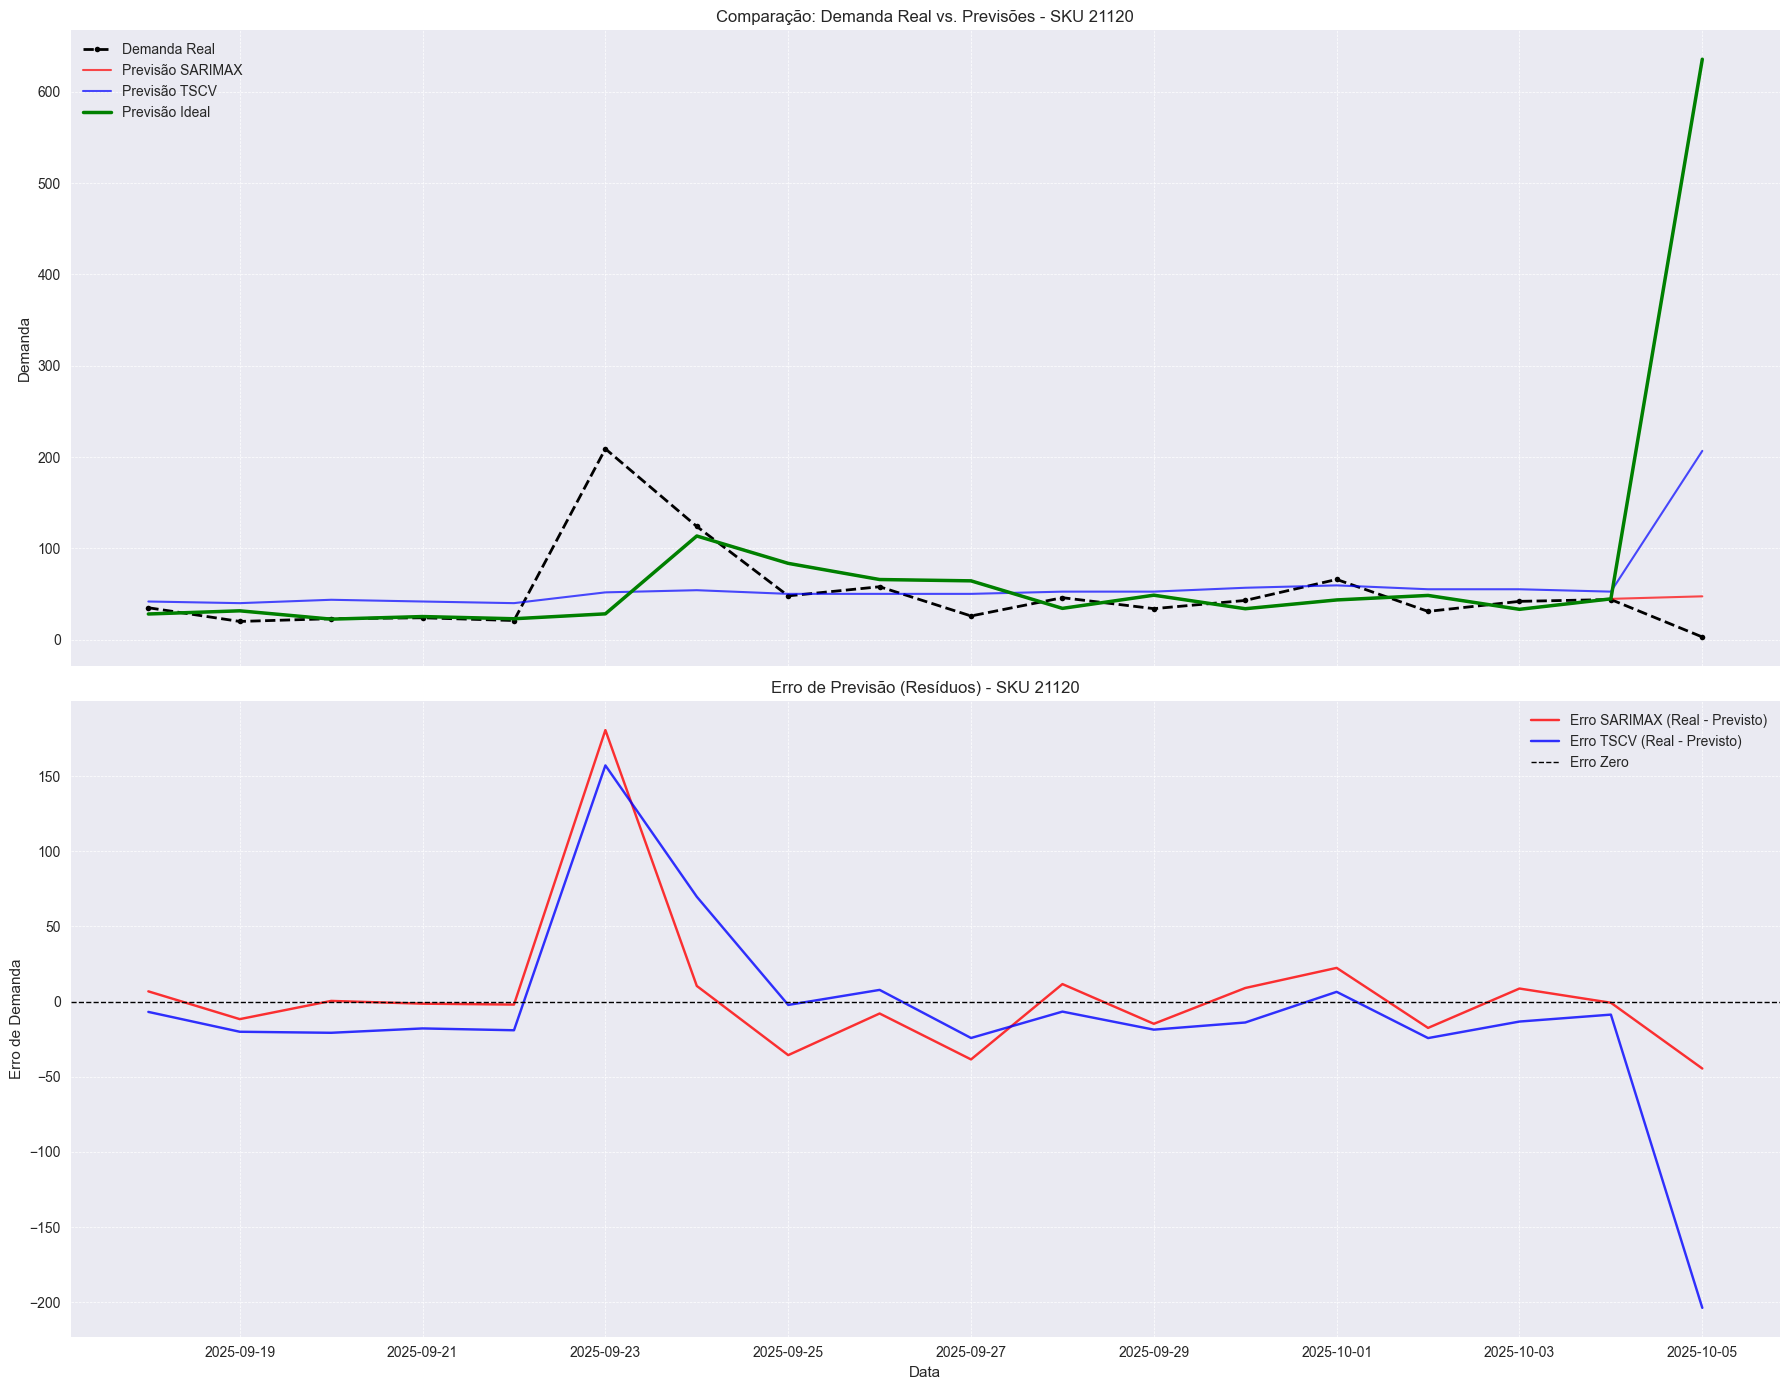

In [24]:
from Functions.FNC_aval_estat import plotar_comparacao_previsoes


plotar_comparacao_previsoes(df_previsoes, Venda, SKU)

### Previsão Futura (Próximos 30 Dias)

--- INICIANDO PREVISÃO PARA OS PRÓXIMOS 30 DIAS (SKU: 21120) ---
Último preço registrado: 54.89 em 2025-10-05
Para os próximos 30 dias, o preço será baseado no mesmo dia 30 dias atrás, ou no último preço se a data não existir.
  INFO: SKU 21120 é um best seller. Aplicando regra de promoção (x2.5) na previsão futura.
  Gerando gráfico de previsão futura...

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_21120.png

Gráfico de previsão salvo em: ../Graficos/previsao_30_dias_sku_21120.png


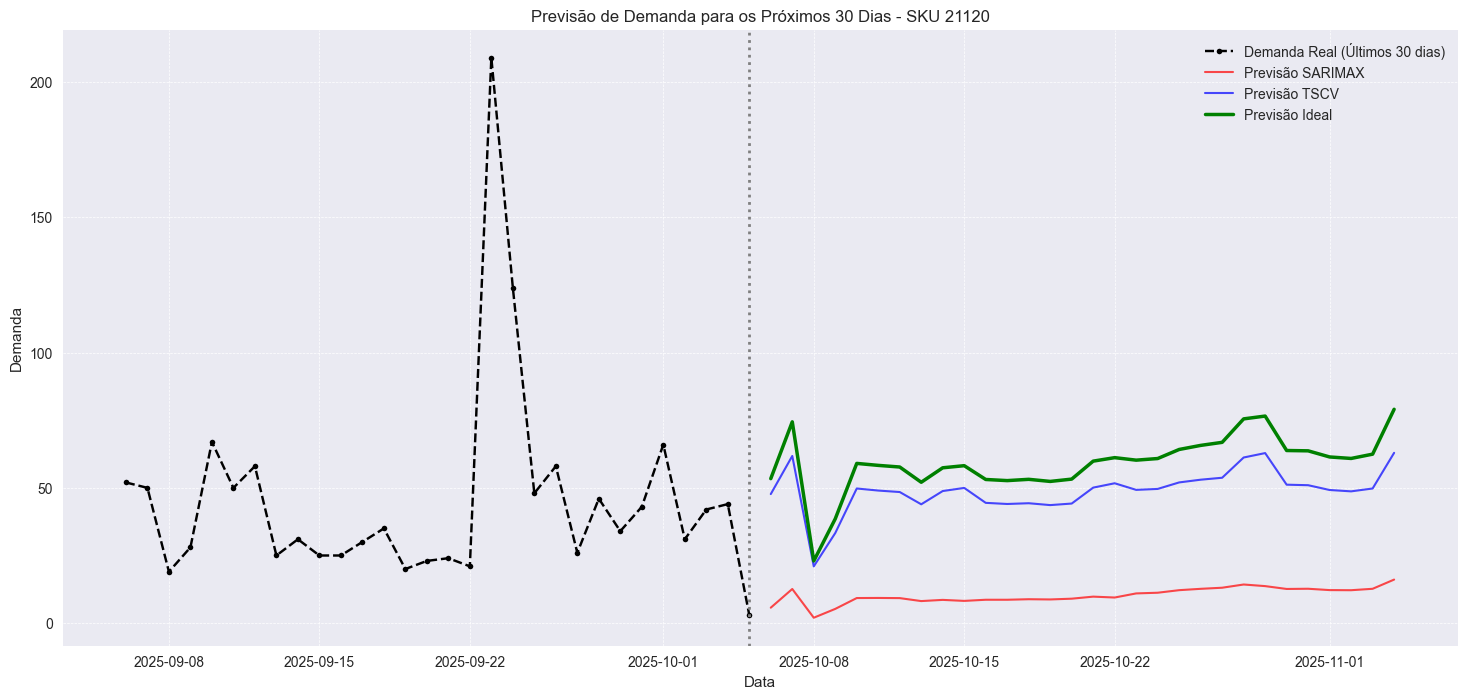

In [26]:
from Functions.FNC_Previsoes import pred_prox_30_dias

# Carregar a lista de best sellers para aplicar a regra de negócio
best_sellers_list = base_best_sellers['SKU'].astype(str).tolist()

# Gerar o gráfico e o DataFrame com a previsão para os próximos 30 dias
df_previsao_futura = pred_prox_30_dias(
    resultados_modelo_principal,
    resultado_sarimax,
    Venda,
    SKU,
    X_cols_tscv=['Log_Preco', 'Quarta-feira', 'Terça-feira', 'promocionado'],
    best_sellers_list=best_sellers_list
)

In [27]:
print("DataFrame com a previsão para os próximos 30 dias:")
df_previsao_futura.head(31)

DataFrame com a previsão para os próximos 30 dias:


,Data,SKU,Preco,promocionado,Log_Preco,Quarta-feira,Terça-feira,previsao_TSCV,previsao_SARIMAX,previsao_total
0,2025-10-06,21120,58.09,0,4.061994,0,0,47.700220,5.710451,53.410671
1,2025-10-07,21120,55.27,0,4.012230,0,1,61.790151,12.618047,74.408199
2,2025-10-08,21120,83.99,0,4.430698,1,0,20.979674,1.998339,22.978013
3,2025-10-09,21120,66.40,0,4.195697,0,0,33.298907,5.261759,38.560666
4,2025-10-10,21120,57.18,0,4.046204,0,0,49.768374,9.271590,59.039964
5,2025-10-11,21120,57.51,0,4.051959,0,0,49.004419,9.307255,58.311674
6,2025-10-12,21120,57.75,0,4.056123,0,0,48.458889,9.247316,57.706205
7,2025-10-13,21120,59.90,0,4.092677,0,0,43.923805,8.149310,52.073115
8,2025-10-14,21120,60.33,0,4.099829,0,1,48.826175,8.591624,57.417798
9,2025-10-15,21120,60.81,0,4.107754,1,0,49.982142,8.217779,58.199921
